<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DLScratch1Study/DLscratch_ch3_prerpare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 210206 밑딥 3장 스터디 준비 / 답 정리

내일 있을 밑바닥부터 시작하는 딥러닝 1권 3장 스터디 내용 정리
및 질의사항, 주요 코드 파트를 정리하려고 한다.


## 3.1 신경망
- 신경망은 입력층 -> 은닉층 -> 출력층으로 구성.
  - 가중치는 입력층과 은닉층들에만 부여.
  - 은닉층을 어떻게 구성하느냐에 따라 신경망의 용도가 달라진다.
- Perceptron의 복습
  - 수식적 표현
  $$ 0(b+w_{1}x_{1}+w_{2}x_{2}\leq 0)$$
  $$ 1(b+w_{1}x_{1}+w_{2}x+{2}>0)$$

  $b$는 편향, w_{1}, w_{2}는 가중치.

- 활성화 함수(activation function)
  - 위를 간단하게 표현하고, 입력신호의 총합을 출력신호로 변환하는 함수를 별도로 빼서 생각하려고 한다. 이를 일반적으로 활성화함수라고 한다.
  - 활성화함수는 **입력 신호의 총합이 활성화를 일으키는지 결정하는 지표 역할을 한다.**
  - 위의 식을 다시 표현하면,
  $$ y = h(b+w_{1}x_{1}+w_{2}x_{2})$$
  여기서 h가 활성화 함수의 역할. 0보다 크면 1을 주고 아니면 0을 줘버리는 함수로 정의하면 될 것이다.

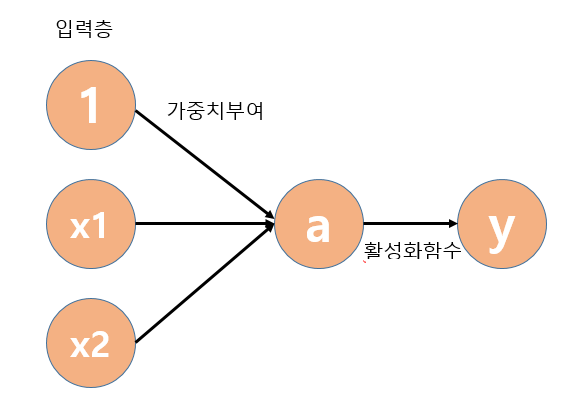

## 3.2 활성화 함수의 종류

### 계단함수
퍼셉트론의 예시처럼, 특정값을 경계로 출력이 바뀌는 함수를 계단함수라고 한다.

In [ ]:
# 계단함수의 구현
import numpy as np

def step_function(x):
  y = x > 0
  return y.astype(np.int)
  # numpy에 적용가능하게(broadcasting을 원함)

x = np.array([-1.5, 2.5, 0])
step_function(x)

array([0, 1, 0])

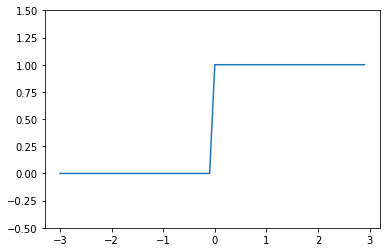

In [ ]:
# 계단함수의 시각화
import matplotlib.pyplot as plt

x = np.arange(-3.0, 3.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.2, 1.2)
plt.show()

### 시그모이드 함수(sigmoid function)
다음과 같은 함수를 시그모이드라고 한다.

$$ \frac{1}{1 + e^{-x}}$$


In [26]:
# 시그모이드 함수의 구현

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.array([-1.5, 2.5, 0])
sigmoid(x)

array([0.18242552, 0.92414182, 0.5       ])

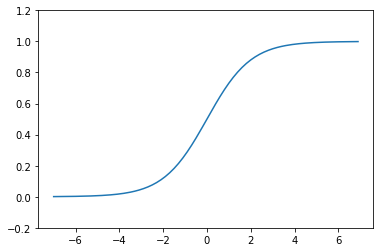

In [ ]:
# 시그모이드의 시각화

x = np.arange(-7.0, 7.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.2, 1.2)
plt.show()

- 굳이 이런 함수를 생각하는 이유는?
  - Logistic Regression 문제에 사용된다.
  - Logistic Regression이란, 범주형 변수에 대한 회귀분석에 사용.  즉 분류 문제를 회귀의 방법으로 풀려는 것이다.
    - 이 방법에서는 답을 0, 1 이렇게 내는 것이 아니라 0.2 0.3.. 이런 식으로 어떤 가능성을 가진 값으로 표현하게 된다. 1에 가까울수록 1에 가깝게 분류될 것이며, 0에 가까울 수록 0에 가깝게 분류될 것이다.
  - 신경망에서 이러한 함수를 사용하는 이유는 학습 과정에서 가중치의 변화에 덜 민감하다는 것이다.
    - 기울기가 step function보다는 약하다. 따라서 가중치의 변경에 조금 덜 민감하다.
  - 그리고 활성화함수는 결국은 합성함수의 개념으로 이해해볼 수 있는데, 선형함수는 아무리 합성해도 결국은 선형이다. 의미가 있나? 다층이나 활성화함수를 복잡하게 짤 이유가 없다.
  

### ReLU 함수 (Rectified Linear unit, 렐루)
0 이하이면 0을 출력하고, 0 이상의 입력은 그대로 출력하는 함수이다.

In [ ]:
# ReLU 함수의 구현

def relu(x):
  return np.maximum(0, x)

x = np.array([-1.5, 2.5, 0])
relu(x)

array([0. , 2.5, 0. ])

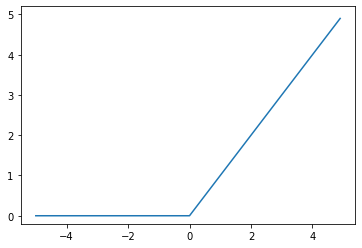

In [ ]:
# ReLU 함수의 시각화
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.2, 5.2)
plt.show()

## 3.3 다차원 배열의 계산

In [ ]:
# 행렬의 차원 확인하고 넘어가기.

A = np.array([[1,1,1],[1,2,3],[1,3,5]])
print(A)
print(np.ndim(A))  # 2다. 사이즈가 아니라 dimension이다.
print(A.shape)

[[1 1 1]
 [1 2 3]
 [1 3 5]]
2
(3, 3)


In [ ]:
# 행렬 곱셈의 구현

A = np.array([[1,1,1],[1,2,3],[1,3,5]])
B = np.array([[1,0,1], [0,1,0], [1,2,3]])
print(np.dot(A, B))

# 참고로, 일차원 행렬일 경우 내적을 계산한다.
C = np.array([1,0,1,0])
D = np.array([1,2,3,4])
print(np.dot(C, D))

[[ 2  3  4]
 [ 4  8 10]
 [ 6 13 16]]
4


- (m * n) 행렬과 (n * k) 행렬을 곱하면 m * k 행렬이 된다. 알아두자. (사이즈가 안맞으면 곱셈 자체가 불가)

- Checkpt. 행렬의 곱셈을 수식으로 표현가능하다.


한편 행렬 곱을 활용하여 입력과 가중치 벡터가 주어졌을 때, 출력벡터를 조정할 수 있다. 여기서는 별도의 활성화 함수 고려 없이. 입력벡터와 가중치만으로, 출력벡터를 만드는 상황을 고려하자.

In [ ]:
X = np.array([1, -1])
# x1에서 나가는 입력벡터의 가중치는 0, 1, 2
# x2에서 나가는 입력벡터의 가중치는 3, 2, 1
W = np.array([[0,1,2],[3,2,1]])
print(np.dot(X, W))

[-3 -1  1]


## 3.4 3층 신경망의 구현

위에서 본 중요한 포인트는, 신경망의 계산은 행렬의 곱셈이라는 점이다.

먼저 순서부터 요약하면 다음과 같다.

- 편향을 포함한 입력 벡터로 첫번째 은닉층에 결과값을 넘긴다.
- 은닉층에서는 활성화 함수로 다시 0, 1 의 입력벡터로 재변환을 실시한다.
- 1층에서 2층으로 넘길때 동일하게 다시 새로운 편향과 새로운 입력벡터로 2층 값을 결정한다.

즉 **간단히 전 층의 출력 = 다음 층의 입력**이라고 이해하면 된다.


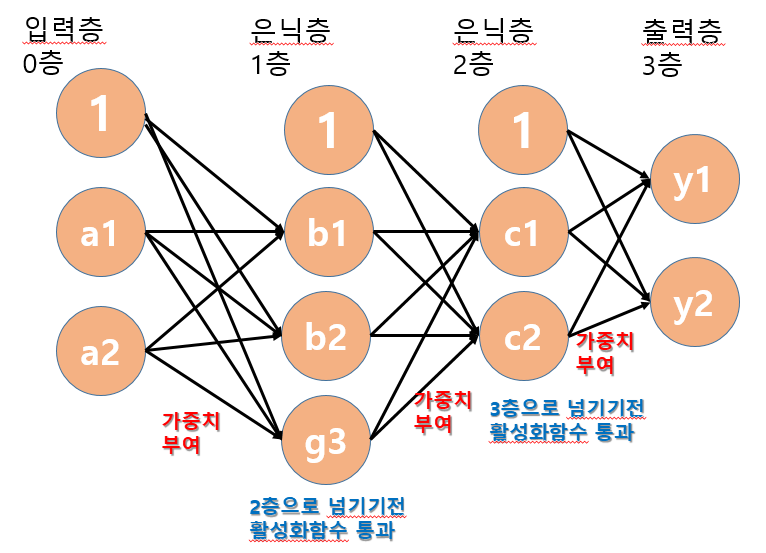

In [ ]:
# 구현정리
# 실제 값을 대입한 예시이다.
# 활성함수 또한 책의 코드대로 진행하였다.
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

# 순전파 3층 신경망의 구현
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  
  return a3

network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
- 출력층에 들어가는 활성화 함수에 대해 고민해보자.
  - 회귀의 경우에는 항등함수를 쓰는 것이 당연하다.
  - 분류라면? softmax함수를 사용할거다.

### 소프트맥스
식은 다음과 같다.
$$ y_{k}=\frac{e^{a_{k}}}{\sum_{i=1}^{n}e^{a_{i}}} $$


그런데, a_k값이 너무 커진다면, 지수함수의 특성상 너무 큰 값이 들어와서 overflow가 발생할 수 밖에 없다. 이 점을 고려하여 식을 변형하여 쓴다.

$$y_{k}=\frac{Ce^{a_{k}}}{C\sum_{i=1}^{n}e^{a_{i}}}=\frac{e^{a_{k}+log C}}{\sum_{i=1}^{n}e^{a_{i}+log C}} $$

여기서 log C를 상수로 보고 처리한다. 오버플로를 막기 위해서는, 입력변수의 최댓값을 빼주면 크게 문제 없을것이다.

- 식을 통해 알 수 있는 사실인데, 소프트맥스 함수의 출력값의 합은 1이다. 따라서 소프트맥스의 출력값은 '확률'의 의미로 해석이 가능하다.

- 질문. 신경망으로 분류할때는 출력층의 소프트맥스 함수를 생략해도 된다가 뭔 의미이지 대체?

In [27]:
# 소프트맥스의 구현

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) # 오버플로 막기
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

x = np.array([3, 4, 5])
softmax(x)

array([0.09003057, 0.24472847, 0.66524096])

## 3.6 손글씨 구분하기 (실전예시)

In [11]:
# data upload
# 질문. colab에서 해봤는데 데이터 로딩부터 안된다...
# 어떻게 해야하나..?

import sys, os
sys.path.append(os.pardir)

from google.colab import files 
src = list(files.upload().values())[0] 
open('load_mnist.py','wb').write(src) 
import load_mnist

Saving mnist.py to mnist (1).py


TypeError: ignored

In [13]:
from keras.datasets import mnist

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 원본 책 코드에서는 normalize, flatten 존재
# flatten은 1차원으로 만듬, normalize는 1 이하 되게 크기 나누기. 

TypeError: ignored

In [25]:
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

img = x_train[0]
label = y_train[0]
print(label)

print(img.shape)
img_show(img)



5
(28, 28)


신경망의 추론 과정을 처리할려고 한다.

입력 뉴런은 28 * 28, 784개.
출력층 뉴런은 0~9 10개로 된다.

Why?  28 * 28칸 픽셀 정보를 바탕으로 숫자를 예측하는 문제다.


In [28]:
def get_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  return x_train, y_train

def init_network():   # Q. sample_weight는 어디에 있어요?
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1)+b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2)+b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3)+b3
  y = softmax(a3)

  return y

predict의 경우는 앞에서 본 3층 신경망의 설계와 거의 동일하다.
대신 sigmoid 2번과 softmax 1번으로 결정이다.

최종 softmax 출력값 중 가장 큰 값으로 인덱스를 결정한다.\
(**softmax를 확률로 해석할 수 있다는** 점을 다시 상기한다.)

In [29]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print(float(accuracy_cnt)/len(x))

FileNotFoundError: ignored

### 배치
배치(Batch)란, 하나로 묶은 입력 데이터를 의미한다. 

위의 예시에서는 100개의 데이터를 각각 1개씩 넣어서 100번 처리하는 것이 아닌, 100개의 데이터를 한번에 넘기는 방식의 연산으로 진행 가능하다.

In [ ]:
# batch의 구현
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  #0부터 100칸씩 점프. 즉 100개가 묶임.
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1) # 최댓값의 인덱스, 100개를 한번에 얻음
  accuracy_cnt += np.sum(p == t[i+t_batch_size])  # 100개짜리 열에서 정답비교

print(float(accuracy_cnt)/len(x))